In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

In [ ]:
# Load dataset
data = pd.read_csv('GOOGL.csv')

In [ ]:
print(len(data))

4431


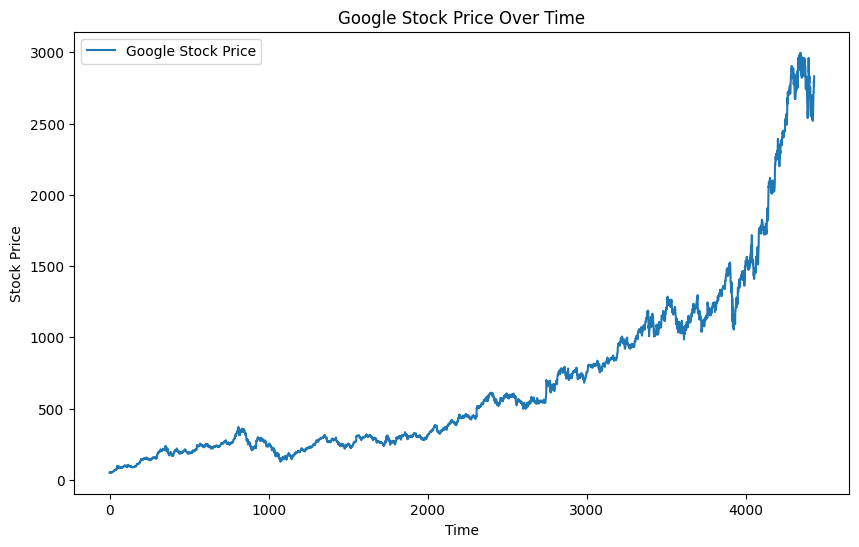

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Over Time')
plt.legend()
plt.show()

In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(data['Close']).reshape(-1, 1))


In [ ]:
# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [ ]:
# Function to create dataset with time steps
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
# Define time steps and create train and test datasets
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
# Reshape data for LSTM input [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50),
    Dense(1)
])

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Measure training time
start_time = time.time()

In [ ]:
# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
54/54 [==============================] - 9s 167ms/step - loss: 3.8632e-05 - val_loss: 9.7605e-04
Epoch 2/50
54/54 [==============================] - 8s 153ms/step - loss: 3.7644e-05 - val_loss: 0.0013
Epoch 3/50
54/54 [==============================] - 7s 121ms/step - loss: 3.8536e-05 - val_loss: 0.0010
Epoch 4/50
54/54 [==============================] - 8s 146ms/step - loss: 3.6884e-05 - val_loss: 0.0015
Epoch 5/50
54/54 [==============================] - 7s 121ms/step - loss: 3.8629e-05 - val_loss: 0.0011
Epoch 6/50
54/54 [==============================] - 8s 146ms/step - loss: 3.8757e-05 - val_loss: 9.6839e-04
Epoch 7/50
54/54 [==============================] - 7s 123ms/step - loss: 3.6568e-05 - val_loss: 0.0011
Epoch 8/50
54/54 [==============================] - 8s 142ms/step - loss: 3.4224e-05 - val_loss: 8.5460e-04
Epoch 9/50
54/54 [==============================] - 8s 152ms/step - loss: 3.2559e-05 - val_loss: 9.8007e-04
Epoch 10/50
54/54 [=============================

In [ ]:
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

Training Time: 594.4108965396881 seconds


In [ ]:
# Evaluate model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)

Train Loss: 1.570330096001271e-05
Test Loss: 0.0004961285158060491


In [ ]:
# Measure prediction time
start_time = time.time()

In [ ]:
# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

25/25 [==============================] - 1s 27ms/step


In [ ]:
prediction_time = time.time() - start_time
print("Prediction Time:", prediction_time, "seconds")

Prediction Time: 18.870620012283325 seconds


In [ ]:
# Inverse scaling to get original stock prices
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

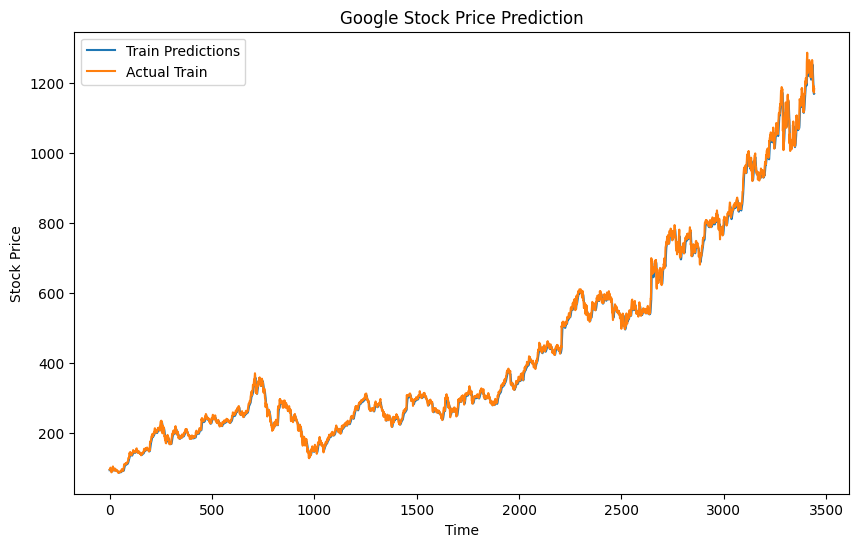

In [ ]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(train_predictions)], train_predictions, label='Train Predictions')
#plt.plot(data.index[len(train_predictions)+time_step:len(train_predictions)+time_step+len(test_predictions)], test_predictions, label='Test Predictions')
plt.plot(data.index[:len(y_train.flatten())], y_train.flatten(), label='Actual Train')
#plt.plot(data.index[len(y_train.flatten())+time_step:len(y_train.flatten())+time_step+len(y_test.flatten())], y_test.flatten(), label='Actual Test')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()

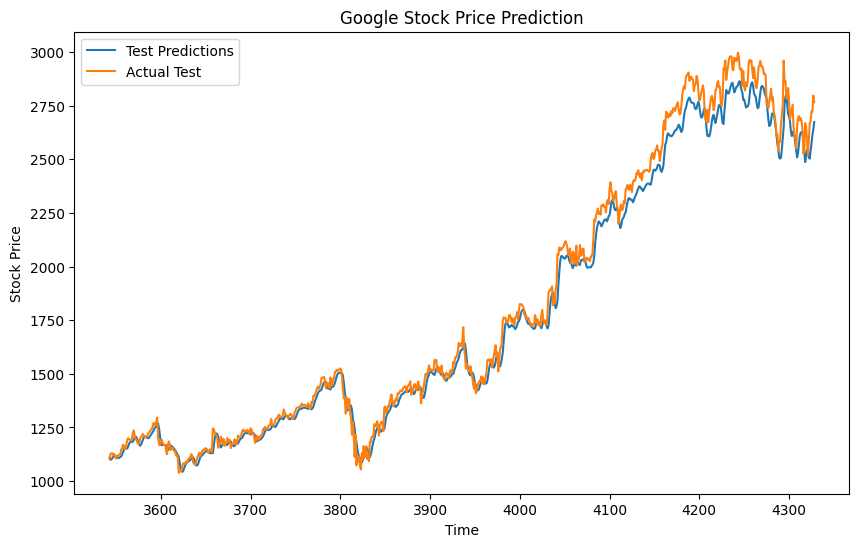

In [ ]:
# Plot predictions
plt.figure(figsize=(10, 6))
#plt.plot(data.index[:len(train_predictions)], train_predictions, label='Train Predictions')
plt.plot(data.index[len(train_predictions)+time_step:len(train_predictions)+time_step+len(test_predictions)], test_predictions, label='Test Predictions')
#plt.plot(data.index[:len(y_train.flatten())], y_train.flatten(), label='Actual Train')
plt.plot(data.index[len(y_train.flatten())+time_step:len(y_train.flatten())+time_step+len(y_test.flatten())], y_test.flatten(), label='Actual Test')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()

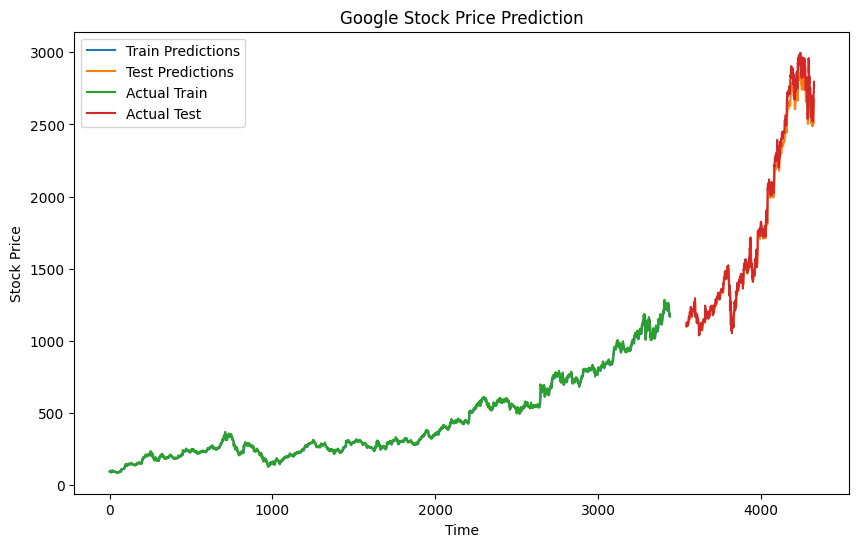

In [ ]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(train_predictions)], train_predictions, label='Train Predictions')
plt.plot(data.index[len(train_predictions)+time_step:len(train_predictions)+time_step+len(test_predictions)], test_predictions, label='Test Predictions')
plt.plot(data.index[:len(y_train.flatten())], y_train.flatten(), label='Actual Train')
plt.plot(data.index[len(y_train.flatten())+time_step:len(y_train.flatten())+time_step+len(y_test.flatten())], y_test.flatten(), label='Actual Test')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()

<!-- This code demonstrates a simple example of how to build an LSTM-based RNN model for time series prediction using the Google stock prices dataset. Here's a brief overview of the steps:

Load and visualize the dataset.

Normalize the data to the range [0, 1].

Split the data into train and test sets.

Create sequences of data with specified time steps.

Build an LSTM model with two LSTM layers and a Dense output layer.

Compile the model with mean squared error loss and Adam optimizer.

Train the model on the train data.

Evaluate the model on both train and test data.

Inverse scale the predictions to get the original stock prices.

Plot the actual vs predicted stock prices for both train and test data. -->